In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")

In [68]:
#Dataframe structure

df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [69]:
#Viewing Dataframe columns

df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [70]:
#Viewing Dataframe columns types

df.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [71]:
#Filtering columns - Creating a new dataframe with a set of columns

df_gviol0 = df[['date', 'state', 'city_or_county', 'n_killed', 'n_injured']]
df_gviol0.head()

,date,state,city_or_county,n_killed,n_injured
0,2013-01-01,Pennsylvania,Mckeesport,0,4
1,2013-01-01,California,Hawthorne,1,3
2,2013-01-01,Ohio,Lorain,1,3
3,2013-01-05,Colorado,Aurora,4,0
4,2013-01-07,North Carolina,Greensboro,2,2


In [72]:
#Creating a new column Total Crime == n_killed + n_injured

df_gviol0["total_crime"] = df_gviol0["n_killed"] + df_gviol0["n_injured"]
df_gviol0.head()

#df_gviol.loc["total_crime"] = df_gviol_f["n_killed"] + df_gviol_f["n_injured"]
#df_gviol.head()

,date,state,city_or_county,n_killed,n_injured,total_crime
0,2013-01-01,Pennsylvania,Mckeesport,0,4,4
1,2013-01-01,California,Hawthorne,1,3,4
2,2013-01-01,Ohio,Lorain,1,3,4
3,2013-01-05,Colorado,Aurora,4,0,4
4,2013-01-07,North Carolina,Greensboro,2,2,4


In [73]:
#Split the date column

y_m_d = df_gviol0['date'].str.split('-', expand=True)
#y_m_d

In [74]:
#add year and month in dataframe 
df_gviol0['year'] = y_m_d[0]
df_gviol0['month'] = y_m_d[1]
df_gviol0.head()

,date,state,city_or_county,n_killed,n_injured,total_crime,year,month
0,2013-01-01,Pennsylvania,Mckeesport,0,4,4,2013,01
1,2013-01-01,California,Hawthorne,1,3,4,2013,01
2,2013-01-01,Ohio,Lorain,1,3,4,2013,01
3,2013-01-05,Colorado,Aurora,4,0,4,2013,01
4,2013-01-07,North Carolina,Greensboro,2,2,4,2013,01


In [75]:
df_gviol0['year'] = df_gviol0['year'].astype(int)
df_gviol0.dtypes

date              object
state             object
city_or_county    object
n_killed           int64
n_injured          int64
total_crime        int64
year               int64
month             object
dtype: object

In [76]:
df_gviol = df_gviol0[(df_gviol0["year"] > 2013) & (df_gviol0["year"] < 2018)]
df_gviol.head()
#df_gviol.groupby("year")["state"].nunique()

,date,state,city_or_county,n_killed,n_injured,total_crime,year,month
278,2014-01-01,Michigan,Muskegon,0,0,0,2014,01
279,2014-01-01,New Jersey,Newark,0,0,0,2014,01
280,2014-01-01,New York,Queens,1,0,1,2014,01
281,2014-01-01,New York,Brooklyn,0,1,1,2014,01
282,2014-01-01,Missouri,Springfield,0,1,1,2014,01


In [12]:
#Sum/Total of all crimes per year.

groupby_year = df_gviol.groupby(['year'])['total_crime'].sum().reset_index()
groupby_year

,year,total_crime
0,2014,35559
1,2015,40451
2,2016,45646
3,2017,46214


In [13]:
#Sorting by total of crimes

groupby_year_sorted = groupby_year.sort_values(['total_crime'], ascending = False)
groupby_year_sorted

,year,total_crime
3,2017,46214
2,2016,45646
1,2015,40451
0,2014,35559


In [14]:
#Calculating Percentage change of total crimes per year

groupby_year['pct_ch'] = groupby_year["total_crime"].pct_change()
groupby_year

,year,total_crime,pct_ch
0,2014,35559,NaN
1,2015,40451,0.137574
2,2016,45646,0.128427
3,2017,46214,0.012444


In [15]:
# Creating a Dataframe with percentage change along years

df_pct_calc = groupby_year["total_crime"].pct_change()
df_pct_calc

0         NaN
1    0.137574
2    0.128427
3    0.012444
Name: total_crime, dtype: float64

In [16]:
#Creating a Dataframe with years-intervals 

intervalos = [["2014-2015", .0], ["2015-2016", .0], ["2016-2017", .0]]
df_pct_year = pd.DataFrame(intervalos, columns = ['Intervalo', 'Pct_change']) 


In [17]:
#Add percentage change to the final DF

for i in df_pct_calc.index:
    if 0 < i:
        df_pct_year["Pct_change"][i-1] = df_pct_calc[i]
        #print(df_pct_calc[i])
#df_pct_year["Pct_change_100"] = df_pct_year["Pct_change"]*100  
        #print (i, df_pct_calc[i], "\n")

In [18]:
df_pct_year["Pct_change_100"] = df_pct_year["Pct_change"]*100
df_pct_year

,Intervalo,Pct_change,Pct_change_100
0,2014-2015,0.137574,13.757417
1,2015-2016,0.128427,12.842699
2,2016-2017,0.012444,1.244359


In [19]:
#Total of crimes by State

groupby_state = df_gviol.groupby(['state'])['total_crime'].sum().reset_index()
groupby_state.head()

,state,total_crime
0,Alabama,4512
1,Alaska,562
2,Arizona,2008
3,Arkansas,1994
4,California,12285


In [20]:
#Sorting by total of crimes

groupby_state_sorted = groupby_state.sort_values(['total_crime'], ascending = False) 
groupby_state_sorted.head()

,state,total_crime
13,Illinois,16094
4,California,12285
43,Texas,10403
9,Florida,10277
35,Ohio,7755


In [21]:
#Sum of States crimes per year 

groupby_st_year = df_gviol.groupby(['state', 'year'])['total_crime'].sum().reset_index()
groupby_st_year.head()

,state,year,total_crime
0,Alabama,2014,916
1,Alabama,2015,947
2,Alabama,2016,1249
3,Alabama,2017,1400
4,Alaska,2014,78


In [22]:
# Creating a Dataframe with percentage change of states along years
#df_pct_state = groupby_st_year["total_crime"].pct_change()

groupby_st_year['pct_ch'] = groupby_st_year.groupby('state')['total_crime'].pct_change()*100
groupby_st_year.head()

,state,year,total_crime,pct_ch
0,Alabama,2014,916,NaN
1,Alabama,2015,947,3.384279
2,Alabama,2016,1249,31.890180
3,Alabama,2017,1400,12.089672
4,Alaska,2014,78,NaN


In [23]:
#Função para gerar novo DF com variação percentual do total de crimes por ano em cada estado

def generate_pcts(df1, df2, len_groups):
    
    increment = len_groups
    df1["pct_14-15"] = .0
    df1["pct_15-16"] = .0
    df1["pct_16-17"] = .0
    count = 1

    for i in df1.index :
        df1["pct_14-15"][i] = (df2.iloc[count]['pct_ch'])
        df1["pct_15-16"][i] = (df2.iloc[count+1]['pct_ch'])
        df1["pct_16-17"][i] = (df2.iloc[count+2]['pct_ch'])
        count += increment
    return df1

In [24]:
df_pct_states = generate_pcts(groupby_state, groupby_st_year, 4)
df_pct_states.head()

,state,total_crime,pct_14-15,pct_15-16,pct_16-17
0,Alabama,4512,3.384279,31.890180,12.089672
1,Alaska,562,97.435897,24.025974,-27.225131
2,Arizona,2008,-7.692308,39.950980,2.802102
3,Arkansas,1994,0.000000,35.250000,20.702403
4,California,12285,-3.621455,12.052464,6.801645


In [25]:
#PLoting total crimes / state

#ax = df_pct_states.plot.bar(x='state', y='total_crime', rot=100)

#df_pct_states['pct_14-15', 'pct_15-16','pct_16-17'].plot.bar()

In [26]:
# Defining function to calculate percentage change between to values

def percent_var(num1, num2):                        #num1 = inicial    num2 = final
    
    percentual_variation = ((num2-num1)/num1)*100
    
    return (percentual_variation)
    
percent_var(12, 18)
    

50.0

In [27]:
#ADD column Percent_13-14 


#groupby_state["Percent_13-14"] = 0
#count = 0

#for i in range(0, 51):
#    num1 = groupby_st_year["total_crime"][i]
#    num2 = groupby_st_year["total_crime"][i+1]
#    groupby_state["Percent_13-14"][i] = percent_var(num1, num2)

#groupby_state.head()    


    
#for index, row in groupby_st_year.iterrows():
#    print (index)
    #groupby_state["total_2013"] = row


In [28]:
# Definindo função para calcular variacao percentual ao longo dos anos

#def create_varp_df(df):
    
#    df_len = len(df.index)
#    #df_new = pd.DataFrame()
#    df["nova"] = 0
    
#    for index, row in df.iterrows():
#        if index == (df_len - 2):
#            break
        
#        else:            
#            num1 = df.at[index,"total_crime"]
#            num2 = df.at[index+1,"total_crime"]
#            percent_i = percent_var(num1, num2)
            
           # df['nova'] = df.at[index, "year"]
           # df_new['var'] = percent_i
#            print(percent_i)
            
            #df_new['intervalo'] = df.at[index, "year"] + df.at[index+1, "year"]
            
    #print (df_new)
       
#create_varp_df(groupby_year) 

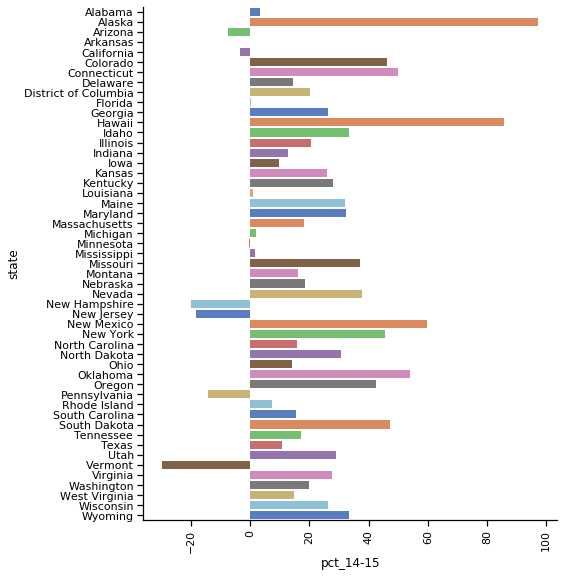

In [29]:
sns.set_context("notebook")

pl_test15 = sns.catplot(x="pct_14-15", y="state", data=df_pct_states,
                height=8, kind="bar", palette="muted")
pl_test15.set_xticklabels(rotation=90)

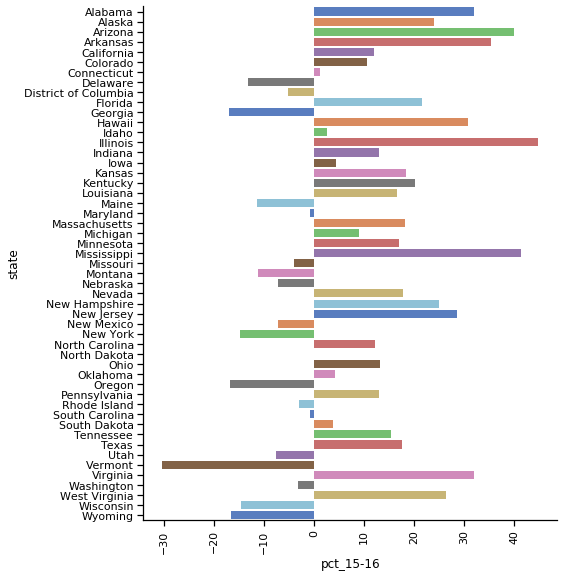

In [30]:
pl_test16 = sns.catplot(x="pct_15-16", y="state", data=df_pct_states,
                height=8, kind="bar", palette="muted")
pl_test16.set_xticklabels(rotation=90)

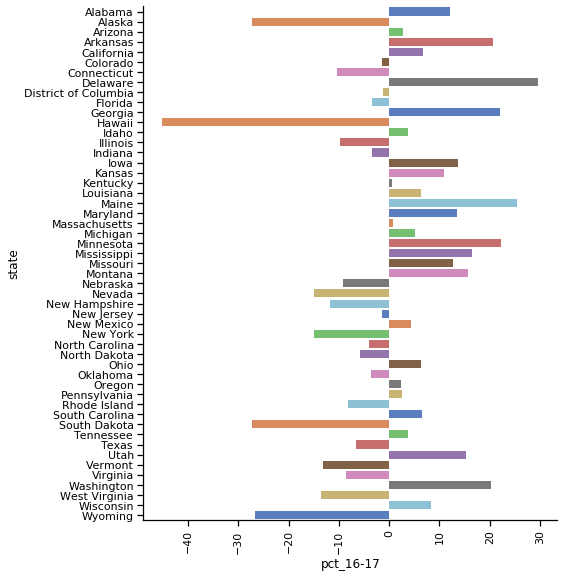

In [31]:
pl_test17 = sns.catplot(x="pct_16-17", y="state", data=df_pct_states,
                height=8, kind="bar", palette="muted")
pl_test17.set_xticklabels(rotation=90)

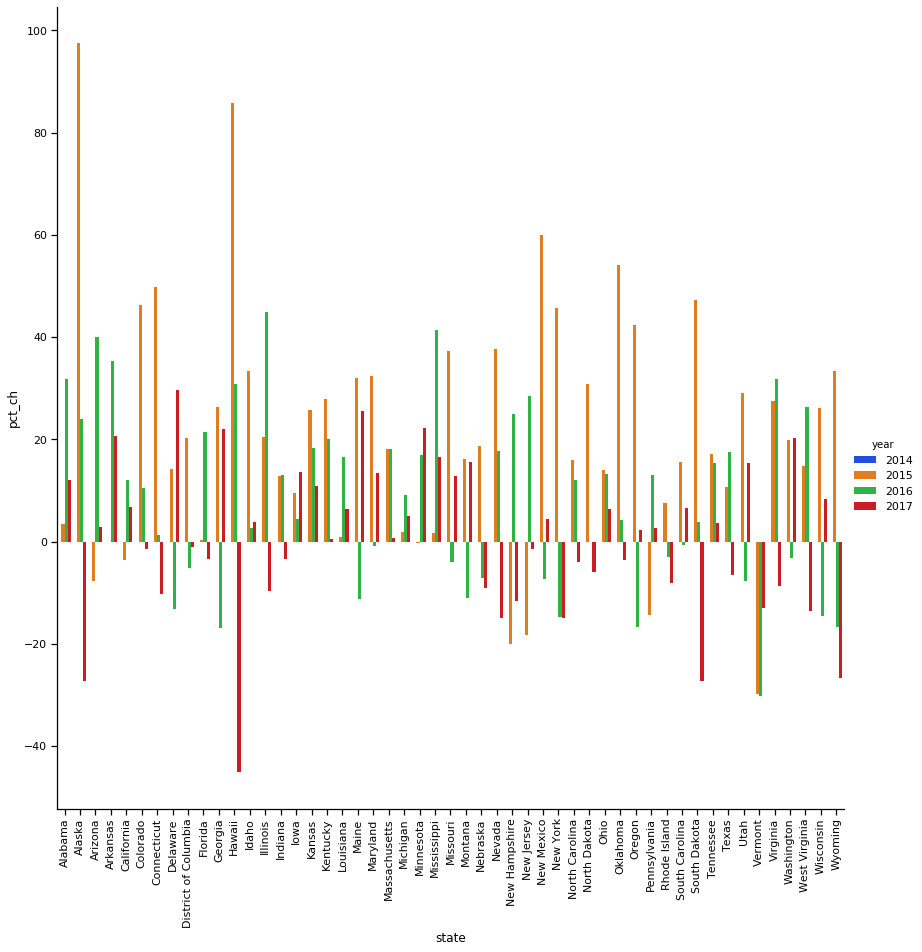

In [32]:
#Visualizando a tabela antiga (com ano 2014, Nan e coluna não renomeada)

sns.set_context("notebook")
test_group = sns.catplot(x="state", y="pct_ch", hue="year", data=groupby_st_year,
                height=12, kind="bar", palette="bright")
test_group.set_xticklabels(rotation=90)

In [33]:
#Removendo linhas que possuem o ano 2014

df_st_year_pct = groupby_st_year.loc[groupby_st_year["year"] > 2014]
df_st_year_pct.head()

,state,year,total_crime,pct_ch
1,Alabama,2015,947,3.384279
2,Alabama,2016,1249,31.890180
3,Alabama,2017,1400,12.089672
5,Alaska,2015,154,97.435897
6,Alaska,2016,191,24.025974


In [34]:
#ALterando as classes dos valores: anos(2015) para intervalos(%2014-2015)

df_st_year_pct.replace([2015, 2016, 2017], ["%2014-2015", "%2015-2016","%2016-2017"], inplace=True)

In [35]:
#Renomeando a coluna year para interval

df_st_year_pct.rename(columns={'year': 'interval'}, inplace=True)
df_st_year_pct.head()

,state,interval,total_crime,pct_ch
1,Alabama,%2014-2015,947,3.384279
2,Alabama,%2015-2016,1249,31.890180
3,Alabama,%2016-2017,1400,12.089672
5,Alaska,%2014-2015,154,97.435897
6,Alaska,%2015-2016,191,24.025974


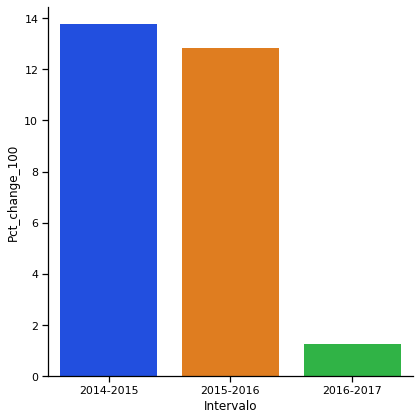

In [36]:
#PLotando o gŕafico das variações percentuais dos crimes dos EUA por ano

sns.set_context("notebook")
test_group = sns.catplot(x="Intervalo", y="Pct_change_100", data=df_pct_year,
                height=6, kind="bar", palette="bright")

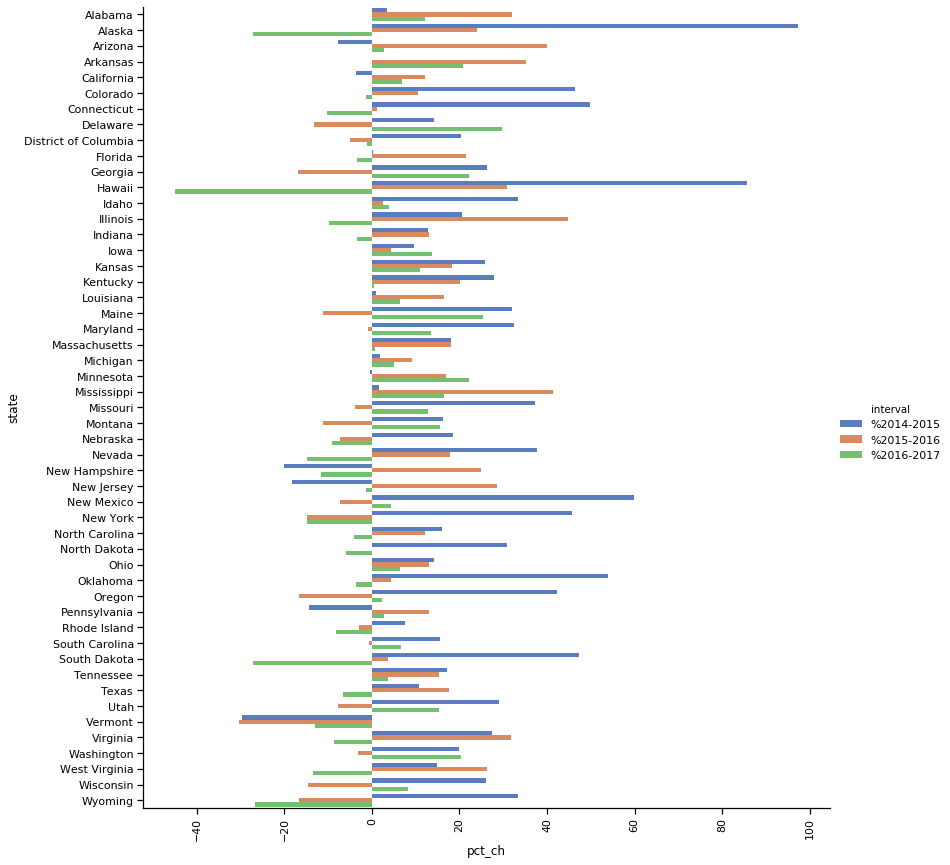

In [37]:
#PLotando o gŕafico das variações percentuais dos crimes dos estados por ano

sns.set_context("notebook")
test_group = sns.catplot(y="state", x="pct_ch", hue="interval", data=df_st_year_pct,
                height=12, kind="bar", palette="muted")
test_group.set_xticklabels(rotation=90)

In [38]:
#Excluindo valores do ano 2014
df_st_year_tt = groupby_st_year.loc[groupby_st_year["year"] > 2014]
df_st_year_tt.head()

,state,year,total_crime,pct_ch
1,Alabama,2015,947,3.384279
2,Alabama,2016,1249,31.890180
3,Alabama,2017,1400,12.089672
5,Alaska,2015,154,97.435897
6,Alaska,2016,191,24.025974


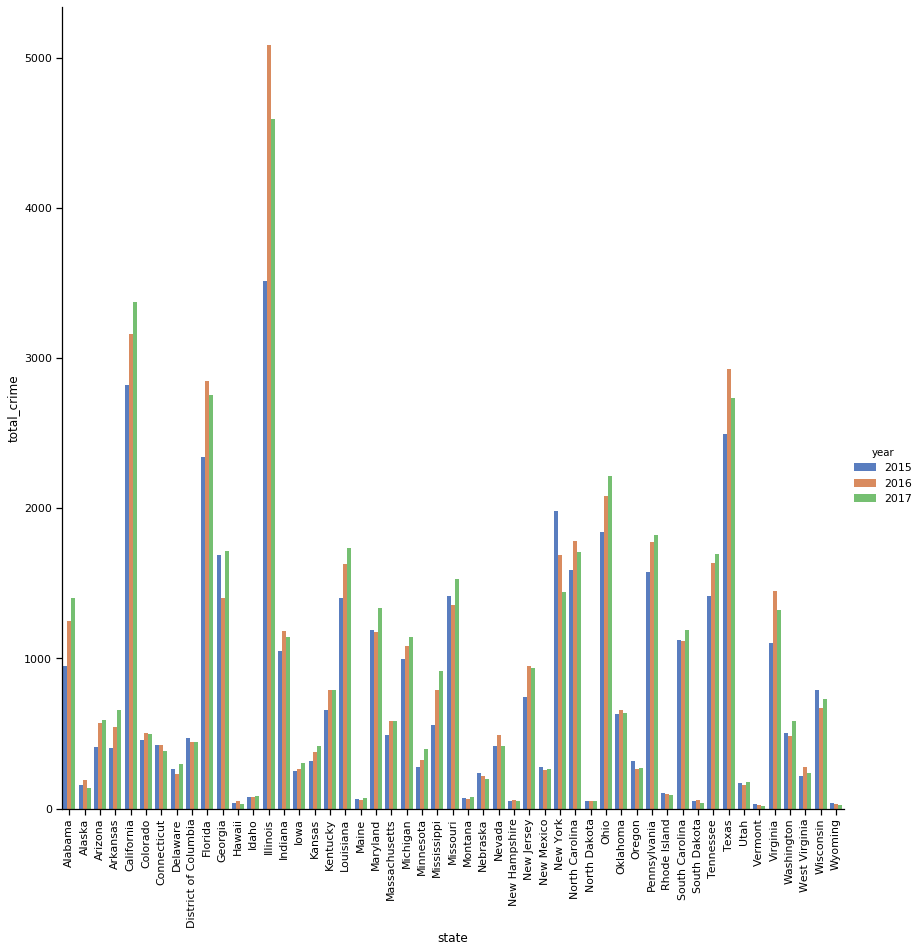

In [39]:
#PLotando o gŕafico das variações percentuais dos crimes dos estados por ano

sns.set_context("notebook")
test_group_y = sns.catplot(x="state", y="total_crime", hue="year", data=df_st_year_tt,
                height=12, kind="bar", palette="muted")
test_group_y.set_xticklabels(rotation=90)

In [66]:
#df_pct_states
from bokeh.plotting import figure
from bokeh.plotting import *
output_notebook()

p = figure(plot_width=400, plot_height=400)

p.vbar(x = "state", top = "pct_14-15", width=4000, source = df_pct_states)

show(p)

Loading BokehJS ...